In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from numba_stats import norm
from numba_stats import uniform
import xarray as xr
import arviz as az

In [22]:
rng = np.random.default_rng(2021)

In [23]:
def target(x):
    return np.exp(-(x**2)) * (2 + np.sin(5 * x) + np.sin(2 * x))

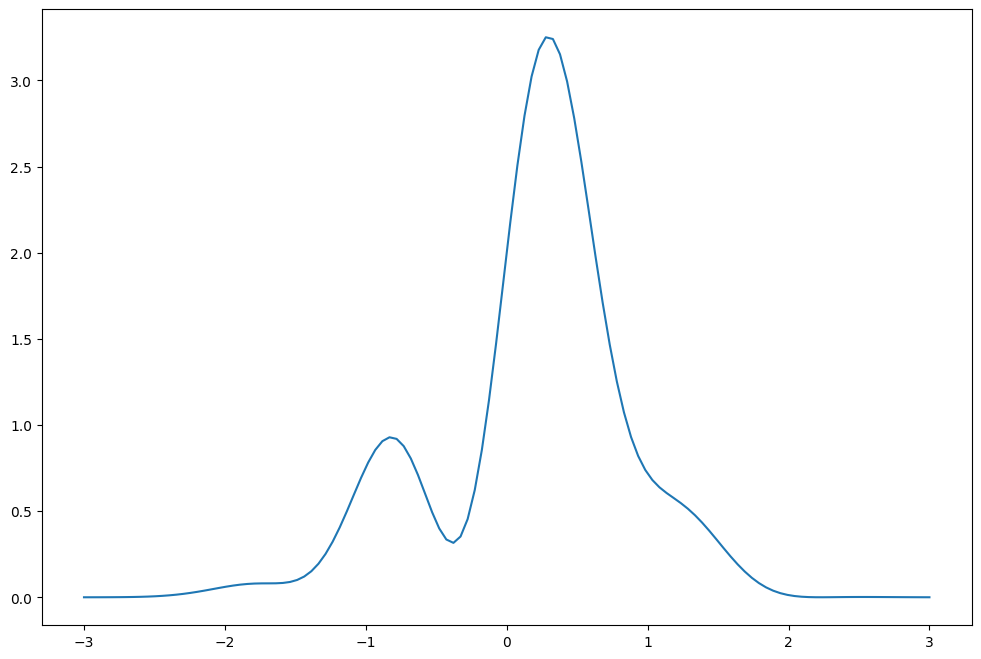

In [24]:
x = np.linspace(-3, 3, 120)
y = target(x)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, y)

In [25]:
def metropolis_iteration(x, prop, u):

    proposed_prob = x + prop
    accept_prob = min(1.0, target(proposed_prob) / target(x))

    value = x

    if u <= accept_prob:
        value = proposed_prob

    return value

In [26]:
def metropolis_sampler(initial_value, n=1000, sigma=1.0, burnin=0, lag=1):

    trace = np.zeros(n)

    current_state = initial_value

    size = burnin + n * lag
    uni = uniform.rvs(a=0, w=1, size=size, random_state=1)
    props = norm.rvs(loc=0, scale=sigma, size=size, random_state=1)

    for i in range(burnin):
        value = metropolis_iteration(current_state, props[i], uni[i])
        current_state = value

    for i in range(n):
        for j in range(lag):
            index = burnin + i * lag + j
            value = metropolis_iteration(current_state, props[index], uni[index])
            current_state = value

        trace[i] = value

    return trace

In [27]:
result = metropolis_sampler(initial_value=0, n=10000, lag=10)

In [28]:
sigmas = [1, 0.025, 50]
n = 10000
traces = []

In [29]:
bins = np.linspace(-3, 3, 120)
p = target(bins)
expected = n * p / sum(p)

In [30]:
for i in range(len(sigmas)):
    traces.append(metropolis_sampler(initial_value=-1, n=n, sigma=sigmas[i]))

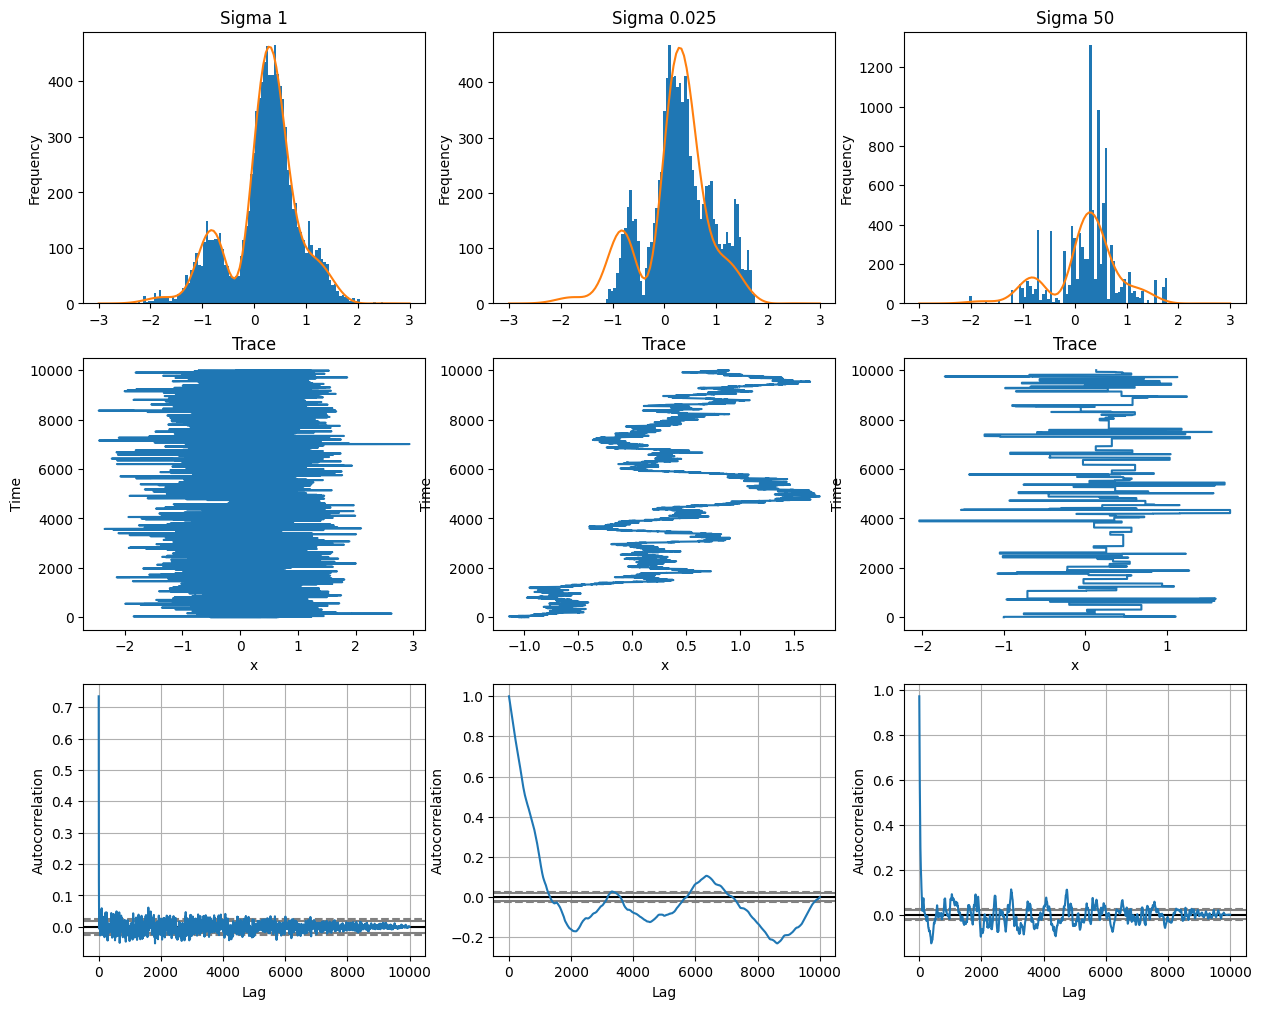

In [31]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for j in range(3):
    axs[0, j].hist(traces[j], bins=bins)
    axs[0, j].set(title="Sigma " + str(sigmas[j]), ylabel="Frequency")
    axs[0, j].plot(bins, expected)
    axs[1, j].plot(traces[j], np.arange(0, n))
    axs[1, j].set(title="Trace", ylabel="Time", xlabel="x")
    autocorrelation_plot(traces[j], axs[2, j])

In [32]:
traces = []
n = 1000
expected = n * p / sum(p)
for i in range(3):
    traces.append(metropolis_sampler(initial_value=-3, n=n, sigma=0.1))

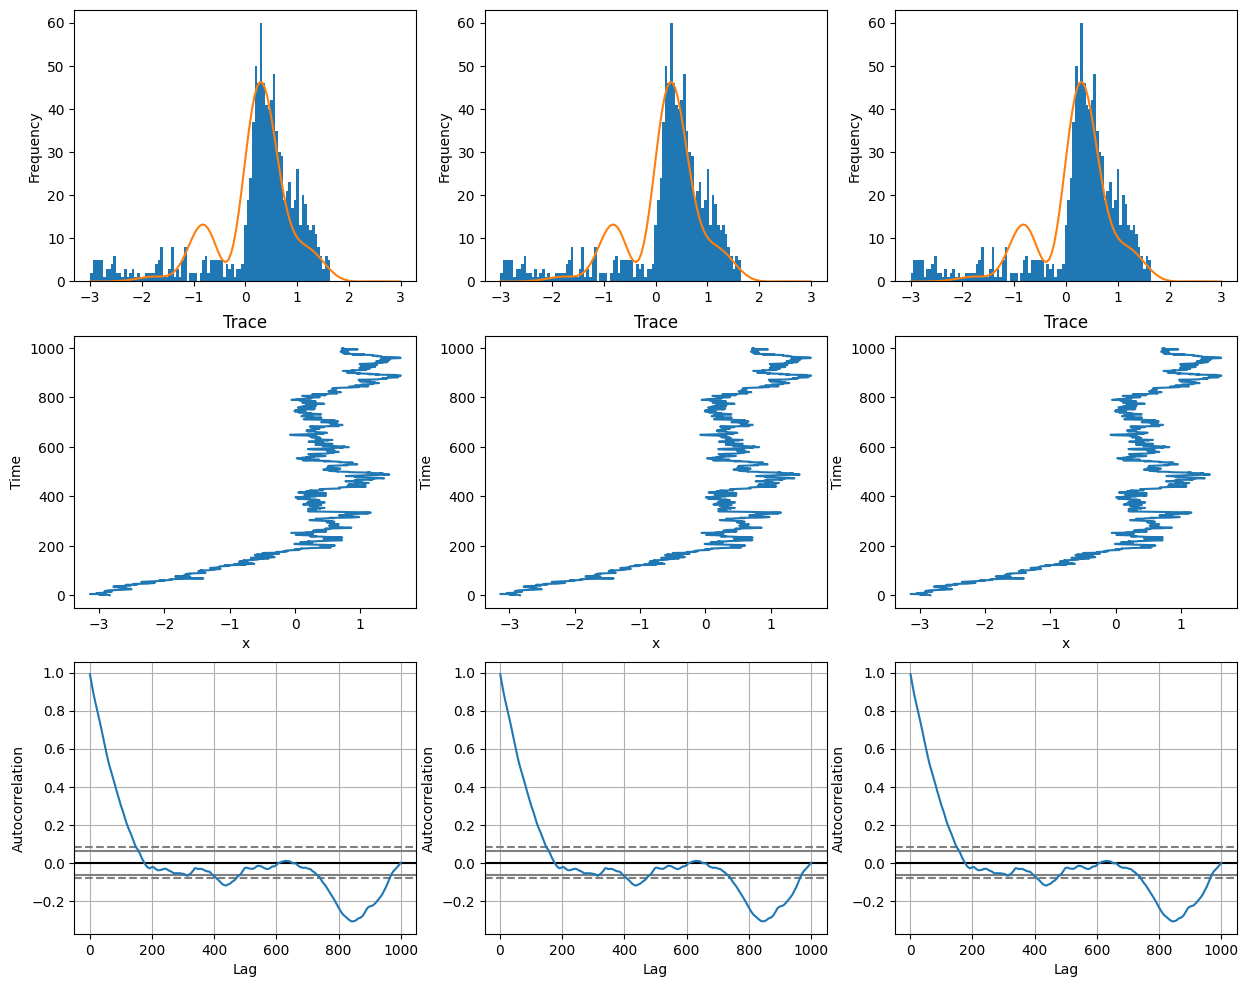

In [33]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for j in range(3):
    axs[0, j].hist(traces[j], bins=bins)
    axs[0, j].plot(bins, expected)
    axs[0, j].set(ylabel="Frequency")
    axs[1, j].plot(traces[j], np.arange(0, n))
    axs[1, j].set(title="Trace", ylabel="Time", xlabel="x")
    autocorrelation_plot(traces[j], axs[2, j])

In [34]:
traces = []
n = 1000
expected = n * p / sum(p)
for i in range(3):
    traces.append(metropolis_sampler(initial_value=-3, burnin=200, n=n, sigma=0.1))

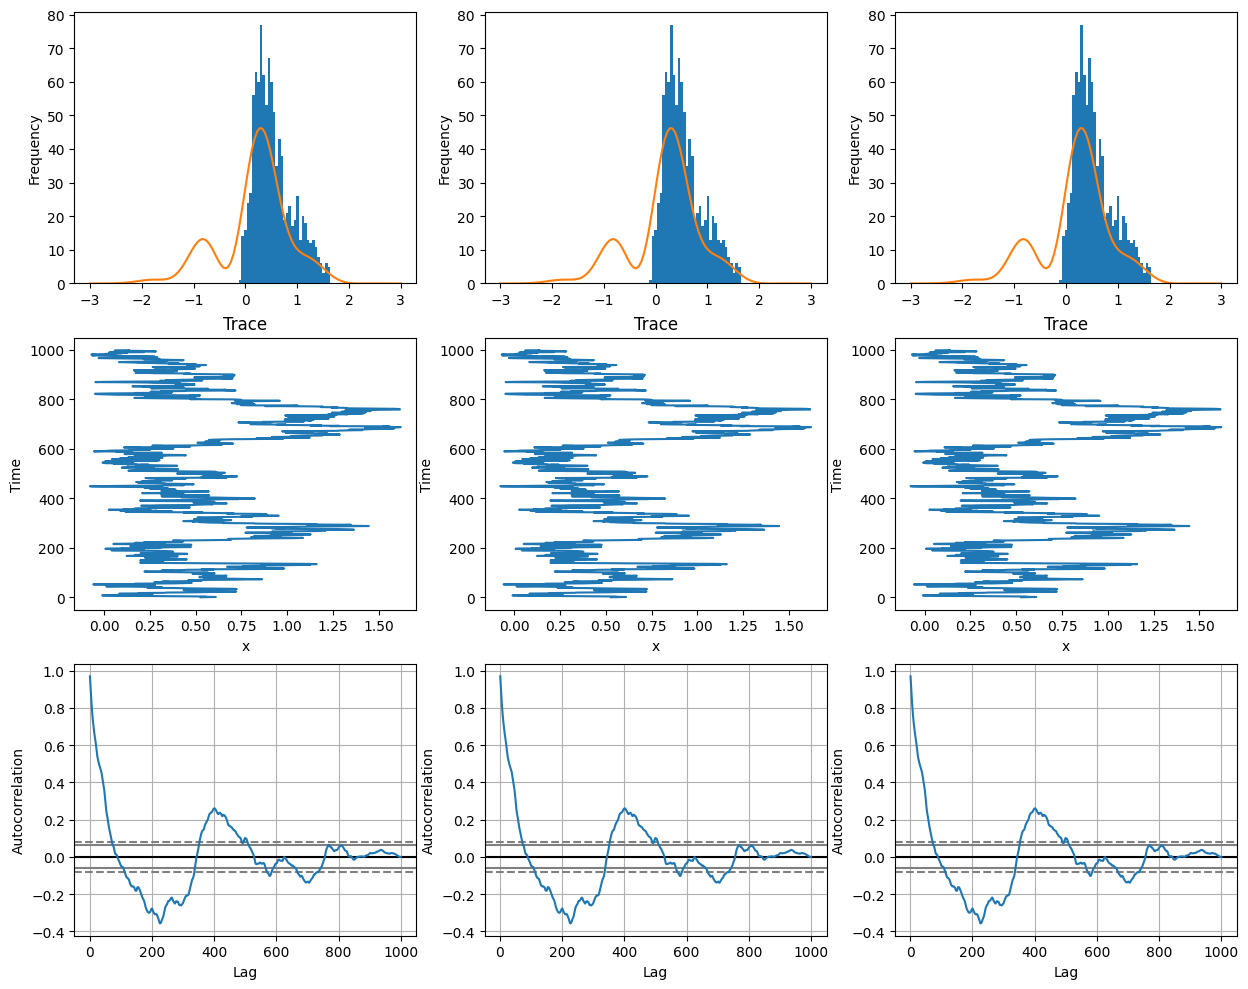

In [35]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for j in range(3):
    axs[0, j].hist(traces[j], bins=bins)
    axs[0, j].plot(bins, expected)
    axs[0, j].set(ylabel="Frequency")
    axs[1, j].plot(traces[j], np.arange(0, n))
    axs[1, j].set(title="Trace", ylabel="Time", xlabel="x")
    autocorrelation_plot(traces[j], axs[2, j])

In [36]:
traces = []
n = 1000
expected = n * p / sum(p)
lag = [1, 10, 100]
for i in range(3):
    traces.append(metropolis_sampler(initial_value=0, lag=lag[i], n=n, sigma=50))

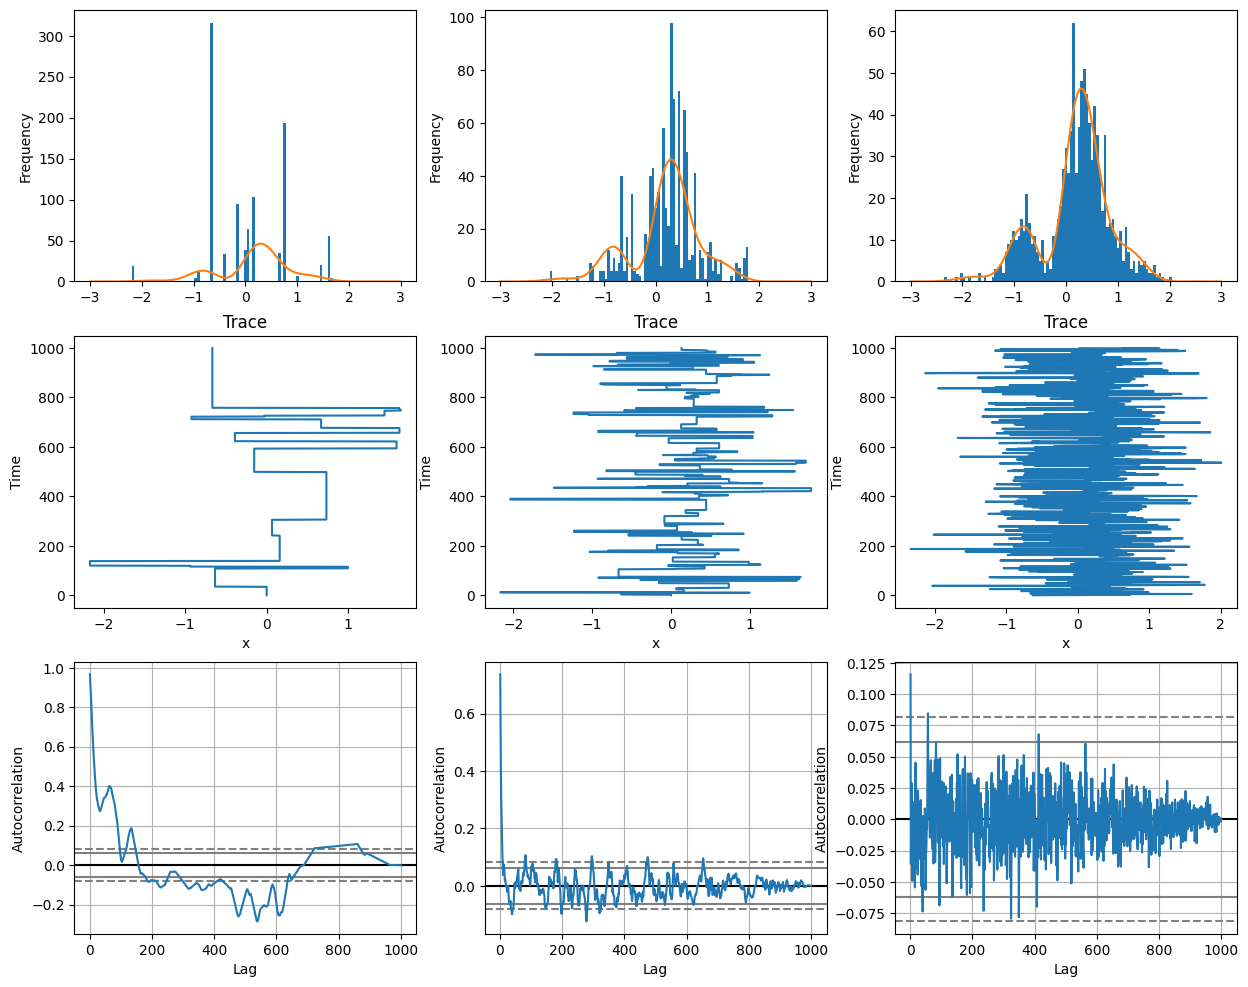

In [37]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for j in range(3):
    axs[0, j].hist(traces[j], bins=bins)
    axs[0, j].plot(bins, expected)
    axs[0, j].set(ylabel="Frequency")
    axs[1, j].plot(traces[j], np.arange(0, n))
    axs[1, j].set(title="Trace", ylabel="Time", xlabel="x")
    autocorrelation_plot(traces[j], axs[2, j])

In [38]:
chains = xr.DataArray(np.array([traces[0]]), dims=["chain", "draw"])

In [39]:
chains

<xarray.DataArray (chain: 1, draw: 1000)> Size: 8kB
array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
        -0.63322995, -0.63322995, -0.63322995, -0.63322995, -0.63322995,
...
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ,
        -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 , -0.6661086 ]])
Dimensions without coordinates: chain, draw

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>]],
      dtype=object)

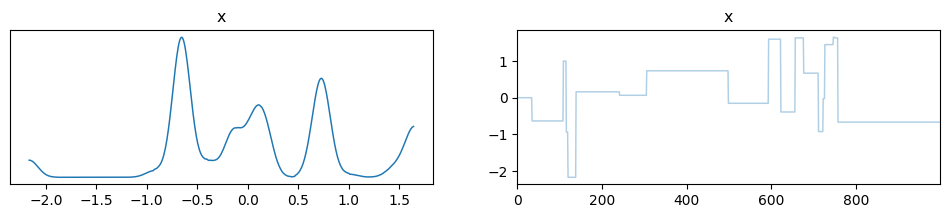

In [40]:
az.plot_trace(chains)


<Axes: title={'center': 'x\n0'}>

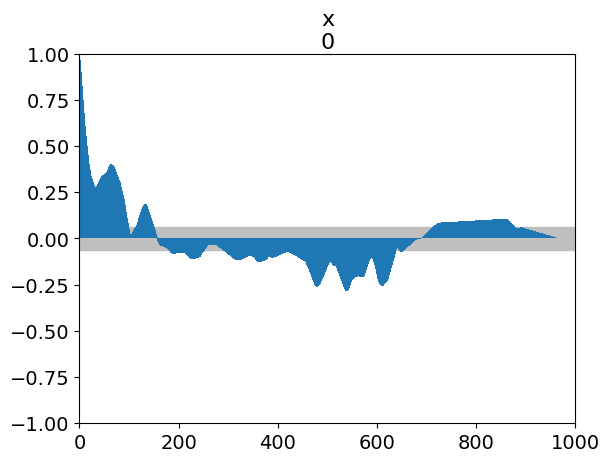

In [41]:
az.plot_autocorr(chains, max_lag=1000)